In [1]:
import pandas as pd
import re
import numpy as np
import nltk
import emoji
import collections
from bpe import Encoder
import gensim
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
import math
import json
import os

In [2]:
def no_accent_vietnamese(s):
    s = re.sub('[áàảãạăắằẳẵặâấầẩẫậ]', 'a', s)
    s = re.sub('[ÁÀẢÃẠĂẮẰẲẴẶÂẤẦẨẪẬ]', 'A', s)
    s = re.sub('[éèẻẽẹêếềểễệ]', 'e', s)
    s = re.sub('[ÉÈẺẼẸÊẾỀỂỄỆ]', 'E', s)
    s = re.sub('[óòỏõọôốồổỗộơớờởỡợ]', 'o', s)
    s = re.sub('[ÓÒỎÕỌÔỐỒỔỖỘƠỚỜỞỠỢ]', 'O', s)
    s = re.sub('[íìỉĩị]', 'i', s)
    s = re.sub('[ÍÌỈĨỊ]', 'I', s)
    s = re.sub('[úùủũụưứừửữự]', 'u', s)
    s = re.sub('[ÚÙỦŨỤƯỨỪỬỮỰ]', 'U', s)
    s = re.sub('[ýỳỷỹỵ]', 'y', s)
    s = re.sub('[ÝỲỶỸỴ]', 'Y', s)
    s = re.sub('đ', 'd', s)
    s = re.sub('Đ', 'D', s)
    return s

def find_accent_vietnamese(line):
    if re.findall('[áàảãạăắằẳẵặâấầẩẫậ]', line) != []:
        return True
    elif re.findall('[ÁÀẢÃẠĂẮẰẲẴẶÂẤẦẨẪẬ]', line) != []:
        return True
    elif re.findall('[éèẻẽẹêếềểễệ]', line) != []:
        return True
    elif re.findall('[ÉÈẺẼẸÊẾỀỂỄỆ]', line) != []:
        return True
    elif re.findall('[óòỏõọôốồổỗộơớờởỡợ]', line) != []:
        return True
    elif re.findall('[ÓÒỎÕỌÔỐỒỔỖỘƠỚỜỞỠỢ]', line) != []:
        return True
    elif re.findall('[íìỉĩị]', line) != []:
        return True
    elif re.findall('[ÍÌỈĨỊ]', line) != []:
        return True
    elif re.findall('[úùủũụưứừửữự]', line) != []:
        return True
    elif re.findall('[ÚÙỦŨỤƯỨỪỬỮỰ]', line) != []:
        return True
    elif re.findall('[ýỳỷỹỵ]', line) != []:
        return True
    elif re.findall('[ÝỲỶỸỴ]', line) != []:
        return True
    elif re.findall('đ', line) != []:
        return True
    elif re.findall('Đ', line) != []:
        return True
    return False

def reformat_unicode(line):
    line = re.sub('à', 'à', line) # a\xcc\x80 -> \xc3\xa0
    line = re.sub('ằ', 'ằ', line) # \xc4\x83\xcc\x80 -> \xe1\xba\xb1
    line = re.sub('ầ', 'ầ', line) # \xc3\xa2\xcc\x80 -> \xe1\xba\xa7
    line = re.sub('è', 'è', line) # e\xcc\x80 -> \xe1\xba\xb9
    line = re.sub('ề', 'ề', line) # \xc3\xaa\xcc\x80 -> \xe1\xbb\x81
    line = re.sub('ò', 'ò', line) # o\xcc\x80 -> \xc3\xb2
    line = re.sub('ồ', 'ồ', line) # \xc3\xb4\xcc\x80 -> \xe1\xbb\x93
    line = re.sub('ờ', 'ờ', line) # \xc6\xa1\xcc\x80 -> \xe1\xbb\x9d
    line = re.sub('ì', 'ì', line) # i\xcc\x80 -> \xc3\xac
    line = re.sub('ù', 'ù', line) # u\xcc\x80 -> \xc3\xb9
    line = re.sub('ừ', 'ừ', line) # \xc6\xb0\xcc\x80 -> \xe1\xbb\xab
    line = re.sub('ỳ', 'ỳ', line) # y\xcc\x80 -> \xe1\xbb\xb3
    
    line = re.sub('á', 'á', line) # a\xcc\x81 -> \xc3\xa1
    line = re.sub('ắ', 'ắ', line) # \xc4\x83\xcc\x81 -> \xe1\xba\xaf
    line = re.sub('ấ', 'ấ', line) # \xc3\xa2\xcc\x81 -> \xe1\xba\xa5
    line = re.sub('é', 'é', line) # e\xcc\x81 -> \xc3\xa9
    line = re.sub('ế', 'ế', line) # \xc3\xaa\xcc\x81 -> \xe1\xba\xbf
    line = re.sub('ó', 'ó', line) # o\xcc\x81 -> \xc3\xb3
    line = re.sub('ố', 'ố', line) # \xc3\xb4\xcc\x81 -> \xe1\xbb\x91
    line = re.sub('ớ', 'ớ', line) # \xc6\xa1\xcc\x81 -> \xe1\xbb\x9b
    line = re.sub('í', 'í', line) # i\xcc\x81 -> \xc3\xad
    line = re.sub('ú', 'ú', line) # u\xcc\x81 -> \xc3\xba
    line = re.sub('ứ', 'ứ', line) # \xc6\xb0\xcc\x81 -> \xe1\xbb\xa9
    line = re.sub('ý', 'ý', line) # y\xcc\x81 -> \xc3\xbd
    
    line = re.sub('ả', 'ả', line) # a\xcc\x89 -> \xe1\xba\xa3
    line = re.sub('ẳ', 'ẳ', line) # \xc4\x83\xcc\x89 -> \xe1\xba\xb3
    line = re.sub('ẩ', 'ẩ', line) # \xc3\xa2\xcc\x89 -> \xe1\xba\xa9
    line = re.sub('ẻ', 'ẻ', line) # e\xcc\x89 -> \xe1\xba\xbb
    line = re.sub('ể', 'ể', line) # \xc3\xaa\xcc\x89 -> \xe1\xbb\x83
    line = re.sub('ỏ', 'ỏ', line) # o\xcc\x89 -> \xe1\xbb\x8f
    line = re.sub('ổ', 'ổ', line) # \xc3\xb4\xcc\x89 -> \xe1\xbb\x95
    line = re.sub('ở', 'ở', line) # \xc6\xa1\xcc\x89 -> \xe1\xbb\x9f
    line = re.sub('ỉ', 'ỉ', line) # i\xcc\x89 -> \xe1\xbb\x89
    line = re.sub('ủ', 'ủ', line) # u\xcc\x89 -> \xe1\xbb\xa7
    line = re.sub('ử', 'ử', line) # \xc6\xb0\xcc\x89 -> \xe1\xbb\xad
    line = re.sub('ỷ', 'ỷ', line) # y\xcc\x89 -> \xe1\xbb\xb7
    
    line = re.sub('ã', 'ã', line) # a\xcc\x83 -> \xc3\xa3
    line = re.sub('ẵ', 'ẵ', line) # \xc4\x83\xcc\x83 -> \xe1\xba\xb5
    line = re.sub('ẫ', 'ẫ', line) # \xc3\xa2\xcc\x83 -> \xe1\xba\xab
    line = re.sub('ẽ', 'ẽ', line) # e\xcc\x83 -> \xe1\xba\xbd
    line = re.sub('ễ', 'ễ', line) # \xc3\xaa\xcc\x83 -> \xe1\xbb\x85
    line = re.sub('õ', 'õ', line) # o\xcc\x83 -> \xc3\xb5
    line = re.sub('ỗ', 'ỗ', line) # \xc3\xb4\xcc\x83 -> \xe1\xbb\x97
    line = re.sub('ỡ', 'ỡ', line) # \xc6\xa1\xcc\x83 -> \xe1\xbb\xa1
    line = re.sub('ĩ', 'ĩ', line) # i\xcc\x83 -> \xc4\xa9
    line = re.sub('ũ', 'ũ', line) # u\xcc\x83 -> \xc5\xa9
    line = re.sub('ữ', 'ữ', line) # \xc6\xb0\xcc\x83 -> \xe1\xba\xb5
    line = re.sub('ỹ', 'ỹ', line) # y\xcc\x83 -> \xe1\xbb\xb9
    
    line = re.sub('ạ', 'ạ', line) # a\xcc\xa3 -> \xe1\xba\xa1
    line = re.sub('ặ', 'ặ', line) # \xc4\x83\xcc\xa3 -> \xe1\xba\xb7
    line = re.sub('ậ', 'ậ', line) # \xc3\xa2\xcc\xa3 -> \xe1\xba\xad
    line = re.sub('ẹ', 'ẹ', line) # e\xcc\xa3 -> \xe1\xba\xb9
    line = re.sub('ệ', 'ệ', line) # \xc3\xaa\xcc\xa3 -> \xe1\xbb\x87
    line = re.sub('ọ', 'ọ', line) # o\xcc\xa3 -> \xe1\xbb\x8d
    line = re.sub('ộ', 'ộ', line) # \xc3\xb4\xcc\xa3 -> \xe1\xbb\x99
    line = re.sub('ợ', 'ợ', line) # \xc6\xa1\xcc\xa3 -> \xe1\xbb\xa3
    line = re.sub('ị', 'ị', line) # i\xcc\xa3 -> \xe1\xbb\x8b
    line = re.sub('ụ', 'ụ', line) # u\xcc\xa3 -> \xe1\xbb\xa5
    line = re.sub('ự', 'ự', line) # \xc6\xb0\xcc\xa3 -> \xe1\xbb\xb1
    line = re.sub('ỵ', 'ỵ', line) # y\xcc\xa3 -> \xe1\xbb\xb5
    
    return line



In [3]:
PUNCT_CHAR = r'["\'.,#$%&~{|}[\]`+]' # 'r'([!”#$%&’()*+,-./:;<=>?@[\]^_`{|}~])'
punct = re.compile(PUNCT_CHAR)

DIGIT_WITH_CHAR = r'([a-zA-Z]*)(\d+)([a-zA-A]*)'
digit = re.compile(DIGIT_WITH_CHAR)

def lowercase(data):
    return [line.lower() for line in data]

def remove_punct_char(data):
    return [punct.sub(' ', line) for line in data] 

def remove_accent(data):
    return [no_accent_vietnamese(line) for line in data]

def reformat_text(data):
    return [reformat_unicode(line) for line in data]

def remove_digit_char(data):
    return [digit.sub('', line) for line in data]

def strip_duplicate_char(word):
    if len(word) == 1:
        return word
    # Strip duplicate char at the end
    last_word = word[-1]
    word = word.rstrip(f'{last_word}')
    word = word + last_word
    # Strip duplicate char at the begining
    first_word = word[0]
    word = word.lstrip(f'{first_word}')
    word = first_word + word
    return word

def strip_head_tail(line):
    line = line.strip()
    return ' '.join([strip_duplicate_char(word) for word in line.split()])

def strip(data):
    return [strip_head_tail(line) for line in data]

def split_emoji(line):
    split_text = emoji.get_emoji_regexp().split(line)
    return [i for i in split_text if i != '' and i != '️'] # <= the second is for red-heart emoji

def get_vocab(data):
    vocab = collections.defaultdict(int)
    data = [split_emoji(i) for i in data]
    for sent_emoji in data:
        for each in sent_emoji:
            for word in each.split():
                vocab[' '.join(list(word)) + ' </w>'] += 1
    return vocab

def add_end_token(line):
    line = split_emoji(line)
    new_arr = []
    for each in line:
        for word in each.split():
            new_arr.append(word + '</w>')
    return ' '.join([word for word in new_arr])

def get_stats(vocab):
        pairs = collections.defaultdict(int)
        for word, freq in vocab.items():
            symbols = word.split()
            for i in range(len(symbols)-1):
                pairs[symbols[i],symbols[i+1]] += freq
        return pairs
    
def merge_vocab(pair, v_in):
    v_out = {}
    bigram = re.escape(' '.join(pair))
    p = re.compile(r'(?<!\S)' + bigram + r'(?!\S)')
    for word in v_in:
        w_out = p.sub(''.join(pair), word)
        v_out[w_out] = v_in[word]
    return v_out

def get_tokens_from_vocab(vocab):
    tokens_frequencies = collections.defaultdict(int)
    vocab_tokenization = {}
    for word, freq in vocab.items():
        word_tokens = word.split()
        for token in word_tokens:
            tokens_frequencies[token] += freq
        vocab_tokenization[''.join(word_tokens)] = word_tokens
    return tokens_frequencies, vocab_tokenization

def get_tokens(vocab):
    tokens = collections.defaultdict(int)
    for word, freq in vocab.items():
        word_tokens = word.split(' ')
        for token in word_tokens:
            tokens[token] += freq
    return tokens

def measure_token_length(token):
    if token[-4:] == '</w>':
        return len(token[:-4]) + 1
    else:
        return len(token)

class BPETokenizer():
    def __init__(self, number_merge=1000, unknown_token='</u>'):
        self.number_merge = number_merge
        self.unknown_token = unknown_token
        
    def fit(self, data):
        vocab = get_vocab(data)
        for _ in range(self.number_merge):
            pairs = get_stats(vocab)
            if not pairs:
                break
            best_pair = max(pairs, key=pairs.get)
            vocab = merge_vocab(best_pair, vocab)
        self.tokens_frequencies, self.vocab_tokenization = get_tokens_from_vocab(vocab)
        self.sorted_tokens_tuple = sorted(self.tokens_frequencies.items(), key=lambda item: (measure_token_length(item[0]), item[1]), reverse=True)
        self.sorted_tokens = [token for (token, freq) in self.sorted_tokens_tuple]
        
    def tokenize(self, string, sorted_tokens):
        if string == '':
            return []
        if self.sorted_tokens == []:
            return [self.unknown_token]
        
        string_tokens = []
        is_tokenized = False
        for i in range(len(sorted_tokens)):
            token = sorted_tokens[i]
            token_reg = re.escape(token.replace('.', '[.]'))

            matched_positions = [(m.start(0), m.end(0)) for m in re.finditer(token_reg, string)]
            if len(matched_positions) == 0:
                continue

            substring_end_positions = [matched_position[0] for matched_position in matched_positions]
            
            substring_start_position = 0
            for substring_end_position in substring_end_positions:
                substring = string[substring_start_position:substring_end_position]
                string_tokens += self.tokenize(string=substring, sorted_tokens=sorted_tokens[i+1:])
                string_tokens += [token]
                substring_start_position = substring_end_position + len(token)
            remaining_substring = string[substring_start_position:]
            string_tokens += self.tokenize(string=remaining_substring, sorted_tokens=sorted_tokens[i+1:])
            break
            
        return string_tokens
    
    
    def tokenize_word(self, string):
        string = add_end_token(string)
        return self.tokenize(string, self.sorted_tokens)


def tokenize(data, encoder):
    data = [encoder.tokenize(i) for i in data]
    return remove_eow_sow(data)
    
def remove_eow_sow(data):
    new_data = []
    for sent in data:
        sent = [word for word in sent if word not in ['__eow', '__sow']]
        new_data.append(sent)
    return new_data

def add_padding(data, max_length=64, padding='__pad'):
    new_data = []
    for sent in data:
        if len(sent) > max_length:
            sent = sent[:max_length]
        else:
            sent += [padding]*(max_length - len(sent))
        new_data.append(sent)
    
    return new_data

def word2vec_embedding(data, model):
    new_data = []
    for sent in data:
        sent = [(model.wv[word][np.newaxis] if word in model.wv.index_to_key else model.wv['__unk'][np.newaxis]) for word in sent]
        sent = np.concatenate(sent, axis=1)
        new_data.append(sent)
    return np.concatenate(new_data)

def create_vocab(data, min_feq=5):
    vocab = collections.defaultdict(int)
    for sent in data:
        for word in sent:
            vocab[word] += 1
    vocab = {k: v for k, v in vocab.items() if v >= min_feq}
    return {k : i for i, (k, v) in enumerate(vocab.items())}


def bow_embedding(data, vocab):
    vocab_size = len(vocab)
    n_dim = len(data)
    new_data = np.zeros((n_dim, vocab_size))
    idf = np.zeros((n_dim, vocab_size))
    for line, sent in enumerate(data):
        for word in sent:
            x, y = line, vocab.get(word)
            if y:
                new_data[x, y] += 1
    return new_data

def tf_idf_embedding(data, vocab):
    vocab_size = len(vocab)
    n_dim = len(data)
    new_data = np.zeros((n_dim, vocab_size))
    idf = np.zeros((n_dim, vocab_size))
    for line, sent in enumerate(data):
        sent_len = len(sent)
        for word in sent:
            x, y = line, vocab.get(word)
            if y:
                new_data[x, y] += 1
            idf[x, y] = 1
    idf = idf.sum(axis=0)
    idf = np.where(idf == 0, 0, np.log(n_dim / idf))
    new_data = new_data * idf
    return new_data

In [4]:
def label(star):
    label = []
    for i in star:
        if i == 5 or i == 4:
            label.append('POS')
        elif i == 3:
            label.append('NEU')
        else:
            label.append('NEG')
    return label

In [5]:
def add_no_accent(data, label, random_state=52):
    no_accent = remove_accent(data)
    for i, sent in enumerate(data):
        if find_accent_vietnamese(sent):
            no_accent += [sent]
            label += [label[i]]
    new_data = np.array(no_accent)
    new_label = np.array(label)
    
    np.random.seed(random_state)
    permutation = np.random.permutation(len(no_accent))
    new_data = new_data[permutation]
    new_label = new_label[permutation]
    return new_data.tolist(), new_label.tolist()

def remove_stopwords(data, stopwords):
    new_data = []
    for sent in data:
        sent = [word for word in sent if word not in stopwords]
        new_data.append(sent)

    return new_data
    

In [6]:
raw_data = pd.read_csv('./data.csv')

In [7]:
raw_data.dropna(inplace=True)

In [47]:
def preprocess(data):
    data_arr = lowercase(data)
    data_arr = reformat_text(data_arr)
    data_arr = remove_punct_char(data_arr)
    #data_arr = remove_digit_char(data_arr)
    data_arr = strip(data_arr)
    return data_arr

def split_train_test(content, star, n_splits=1, test_size=0.2, random_state=52):
    split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=52)
    for train_index, test_index in split.split(content, star):
        content = np.array(content)
        star = np.array(star)
        content_train, content_test  = content[train_index].tolist(), content[test_index].tolist()
        star_train, star_test = star[train_index].tolist(), star[test_index].tolist()
        
    return content_train, content_test, star_train, star_test

In [42]:
content, star = raw_data.content, raw_data.start

In [43]:
content = content.to_list()
star = star.to_list()

In [21]:
index = 0
for sent in content:
    if sent == []:
        print('alo')

In [44]:
content = preprocess(content)
content

['áo bao đẹp ạ!',
 'tuyệt vời',
 '2day ao khong giong trong',
 'mùi thơm bôi lên da mềm da',
 'vải đẹp dày dặn',
 'hàng rất đẹp rất chi là ưng ý',
 'chất lượng sản phẩm tốt date dài',
 'ăn nói và thái độ phục vụ tốt',
 'đóng gói sản phẩm chắc chắn',
 'tất sờn hết ca chưa dùng mà vay r',
 'shop phục vụ rất tốt',
 'mặc thì cũng đc',
 'chất vải khỏi chê',
 'thời gian giao hàng rất nhanh',
 'chất lượng sản phẩm tuyệt vời',
 'vải hơi thô cứng thời gian giao hàng nhanh',
 'chất lượng sp chưa thật sự đẹp nhe shop',
 'rất đáng tiền thời gian giao hàng rất nhanh',
 'quần rất đẹp mặc vừa vặn',
 'cảm giác mua hàng bị hớ thật tệ',
 'khi mua về nên đi sửa lại',
 'với giá này thì sản phẩm tạm ổn chưa đc gọi là đẹp lắm',
 'rất đáng tiền thời gian giao hàng rất nhanh chất lượng sản phẩm tuyệt vời',
 'giá cả chấp nhận được',
 'nchung là rất ổn ❤️',
 'áo quá đẹp luôn nếu không muốn nói là đẹp may quá có áo mới đi làm cty mới shop còn mẫu nào trắng nữa để mình mua',
 'chưa mặc nhưng thấy chất dày dặn nhì

In [48]:
content_train, content_test, star_train, star_test = split_train_test(content, star)

In [127]:
from sklearn.base import BaseEstimator, TransformerMixin
class Tokenizer(BaseEstimator, TransformerMixin):
    def __init__(self, vocab_size=2000, pct_bpe=1, ngram_min=2, ngram_max=7, min_feq=5):
        self.vocab_size = vocab_size
        self.pct_bpe = pct_bpe
        self.ngram_min = ngram_min
        self.ngram_max = ngram_max
        self.min_feq = min_feq
    
    def fit(self, X, y=None):
        print('token fit call')
        self.encoder = Encoder(self.vocab_size,
                               pct_bpe=self.pct_bpe,
                               ngram_min=self.ngram_min,
                               ngram_max=self.ngram_max)
        self.encoder.fit(X)
        token = tokenize(X, self.encoder)
        self.vocab = create_vocab(token, self.min_feq)
        return self
    
    def transform(self, X, *args, **kwargs):
        print('token transfrom call')
        token = tokenize(X, self.encoder)
        return token, self.vocab

    
class WithoutStopWord(BaseEstimator, TransformerMixin):
    def __init__(self, stopwords):
        self.stopwords = stopwords
        
    def fit(self, X, y=None):
        return self

    def transform(self, X, *args, **kwargs):
        data, vocab = X
        data = remove_stopwords(data, self.stopwords)
    
        vocab = {k : v for k, v in vocab.items() if k not in self.stopwords}
        vocab = {k : i for i, (k, v) in enumerate(vocab.items())}
        return data, vocab
        
    
class Padding(BaseEstimator, TransformerMixin):
    def __init__(self, max_length=20):
        self.max_length = max_length
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, *args, **kwargs): 
        data, vocab = X
        return add_padding(data, self.max_length)
    
class BowEmbedding(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, *args, **kwargs):
        data, vocab = X 
        return bow_embedding(data, vocab)
        
class TfIdfEmbedding(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        print('tf fit call')
        return self
    
    def transform(self, X, *args, **kwargs):
        print('tf transform call')
        data, vocab = X
        return tf_idf_embedding(data, vocab)

        
class W2VEmbedding(BaseEstimator, TransformerMixin):
    def __init__(self,  vector_size=100, min_count=5, sg=True, hs=True, window=10, workers=4):
        self.vector_size = vector_size
        self.min_count = min_count
        self.sg = sg
        self.hs = hs
        self.window = window
        self.workers = workers
        
    def fit(self, X, y=None):
        self.model = gensim.models.Word2Vec(X,
                                            vector_size=self.vector_size,
                                            min_count=self.min_count,
                                            sg=self.sg,
                                            hs=self.hs,
                                            window=self.window,
                                            workers=self.workers)
        return self
    
    def transform(self, X, *args, **kwargs):
        return word2vec_embedding(X, self.model)
            
class ReportResult(BaseEstimator, TransformerMixin):
    def __init__(self, estimator_name):
        self.estimator_name = estimator_name
        
    def fit(self, X, y=None):
        self.predict_label = label(X)
        self.true_label = label(y)
        return self

    def transform(self, X):
        report = classification_report(self.predict_label, self.true_label, output_dict=False)
#         if not os.path.exists('report.json'):
#             with open('report.json', 'w') as f:
#                 json.dump({self.estimator_name : [report]}, f)
#         else:            
#             with open('report.json', 'r') as f:
#                 data = json.load(f)
#                 data[self.estimator_name].append(report)
#                 json.dumps(data)
        return report

In [50]:
def load_stopwords():
    with open('./stopwords.txt', 'r') as f:
        lines = f.readlines()
        stopwords = [line[:-1] for line in lines if ' ' not  in line]
    return stopwords

In [51]:
stopwords = load_stopwords()

In [ ]:
content_train, star_train = add_no_accent(content_train, star_train)

In [162]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
bow_processing = Pipeline([('tokenizer', Tokenizer(8192, 0.5)),('stopwords', WithoutStopWord(stopwords)), ('embedding', BowEmbedding())])
tf_idf_processing = Pipeline([('tokenizer', Tokenizer(8192, 0.5)), ('embedding', TfIdfEmbedding())])
w2v_processing = Pipeline([('tokenizer', Tokenizer(3500, 0.7)), ('padding', Padding(max_length=64)), ('embedding', W2VEmbedding(vector_size=1))])

In [ ]:
w2v_processing.fit_transform(content_train)

In [131]:
multi_nb = Pipeline([('feature_processing', tf_idf_processing), ('estimator', MultinomialNB())])
multi_nb.fit(content_train, star_train)

token fit call
token transfrom call
tf fit call
tf transform call


Pipeline(steps=[('feature_processing',
                 Pipeline(steps=[('tokenizer',
                                  Tokenizer(pct_bpe=0.5, vocab_size=8192)),
                                 ('embedding', TfIdfEmbedding())])),
                ('estimator', MultinomialNB())])

In [132]:
report = ReportResult('MultiNB')
print(report.fit_transform(multi_nb.predict(content_test), star_test))

token transfrom call
tf transform call
              precision    recall  f1-score   support

         NEG       0.74      0.62      0.68      1590
         NEU       0.33      0.35      0.34       880
         POS       0.84      0.88      0.86      3818

    accuracy                           0.74      6288
   macro avg       0.64      0.62      0.63      6288
weighted avg       0.74      0.74      0.74      6288



In [ ]:
from sklearn.naive_bayes import BernoulliNB
bernoulli_nb = Pipeline([('feature_processing', bow_processing), ('estimator', BernoulliNB())])
bernoulli_nb.fit(content_train, star_train)

In [ ]:
report = ReportResult('BernoulliNB')
report.fit_transform(bernoulli_nb.predict(content_test), star_test)

In [87]:
from sklearn.linear_model import LogisticRegression
logistic_clf = Pipeline([('feature_processing', tf_idf_processing), ('estimator', LogisticRegression(max_iter=5000, C=0.5))])
logistic_clf.fit(content_train, star_train)

Pipeline(steps=[('feature_processing',
                 Pipeline(steps=[('tokenizer',
                                  Tokenizer(pct_bpe=0.5, vocab_size=8192)),
                                 ('embedding', TfIdfEmbedding())])),
                ('estimator', LogisticRegression(C=0.5, max_iter=5000))])

In [88]:
report = ReportResult('Softmax')
print(report.fit_transform(logistic_clf.predict(content_test), star_test))

              precision    recall  f1-score   support

         NEG       0.69      0.71      0.70      1288
         NEU       0.34      0.38      0.36       828
         POS       0.90      0.87      0.88      4172

    accuracy                           0.77      6288
   macro avg       0.64      0.65      0.65      6288
weighted avg       0.78      0.77      0.78      6288



In [ ]:
from sklearn.svm import LinearSVC
multi_svm = Pipeline([('feature_preprocessing', w2v_processing), ('estimator', LinearSVC(multi_class='ovr', max_iter=2000))])
multi_svm.fit(content_train, star_train)

In [ ]:
predict = multi_svm.predict(content_test)

In [ ]:
report = ReportResult('LinearSVC')
report.fit_transform(predict, star_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
d_tree_clf = Pipeline([('feature_processing', tf_idf_processing), ('estimator', DecisionTreeClassifier())])
d_tree_clf.fit(content_train, star_train)

In [ ]:
report = ReportResult('Decision tree')
print(report.fit_transform(d_tree_clf.predict(content_test), star_test))

In [167]:
from sklearn.ensemble import RandomForestClassifier
ran_forest_clf = Pipeline([('feature_processing', w2v_processing), ('estimator', RandomForestClassifier(n_estimators=500, min_samples_leaf=2, n_jobs=-1))])
ran_forest_clf.fit(content_train, star_train)

token fit call
token transfrom call


Pipeline(steps=[('feature_processing',
                 Pipeline(steps=[('tokenizer',
                                  Tokenizer(pct_bpe=0.7, vocab_size=3500)),
                                 ('padding', Padding(max_length=64)),
                                 ('embedding', W2VEmbedding(vector_size=1))])),
                ('estimator',
                 RandomForestClassifier(min_samples_leaf=2, n_estimators=500,
                                        n_jobs=-1))])

In [168]:
report = ReportResult('Random_forest')
print(report.fit_transform(ran_forest_clf.predict(content_test), star_test))

token transfrom call
              precision    recall  f1-score   support

         NEG       0.23      0.63      0.34       494
         NEU       0.32      0.33      0.32       934
         POS       0.92      0.76      0.83      4860

    accuracy                           0.68      6288
   macro avg       0.49      0.57      0.50      6288
weighted avg       0.77      0.68      0.71      6288



In [ ]:
from sklearn.model_selection import GridSearchCV
grid_params = [{'padding__max_length': np.arange(10, 100, 10), 'embedding__vector_size': np.arange(10, 100, 10)}]
estimator = Pipeline([('tokenizer', Tokenizer()), ('padding', Padding()), ('embedding', W2VEmbedding()), ('ran_forest_clf', RandomForestClassifier(n_estimators=500, min_samples_leaf=4))])
gs_ran_forest = GridSearchCV(estimator, param_grid=grid_params, scoring='accuracy', cv=5)

In [ ]:
gs_ran_forest.fit(content_train, star_train)

In [ ]:
report = ReportResult('MultiNB')
print(report.fit_transform(gs_ran_forest.predict(content_test), star_test))

In [ ]:
gs_ran_forest.best_params_

In [ ]:
gs_mul_nb.best_params_

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_params = [{'tokenizer__vocab_size': np.arange(4000, , 100), 'tokenizer__pct_bpe': np.arange(0.5, 1, 0.1)}]
estimator = Pipeline([('tokenizer', Tokenizer()), ('embedding', TfIdfEmbedding()), ('multi_nb', MultinomialNB())])
gs_multi_nb = GridSearchCV(estimator, param_grid=grid_params, scoring='accuracy', cv=5)

In [ ]:
gs_multi_nb.fit(content_train, star_train)

In [ ]:
report = ReportResult('MultiNB')
print(report.fit_transform(gs_multi_nb.predict(content_test), star_test))

In [ ]:
gs_multi_nb.best_params_

In [ ]:
c, s = add_no_accent(content_train, star_train)

In [ ]:
def add_no_accent(data, label):
    no_accent = remove_accent(data)
    for i, sent in enumerate(data):
        if find_accent_vietnamese(sent):
            no_accent += [sent]
            label += [label[i]]
#     np.random.seed(52)
#     np.random.shuffle(no_accent)
#     np.random.seed(52)
#     np.random.shuffle(label)
    return no_accent, label

In [ ]:
content_train

In [31]:
encoder = Encoder(vocab_size=5000, pct_bpe=0.9, ngram_max=7)
encoder.fit(content_train)

In [ ]:
for i in remove_stopwords(tokenize(content_train, encoder), stopwords):
    print(i)

In [34]:
encoder.tokenize('toiratthich:)')

['__sow', 'toi', 'rat', 'thich', '__eow', ':)']

In [35]:
from sklearn.model_selection import StratifiedShuffleSplit

In [36]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=52)
for train_index, test_index in split.split(content, star):
    content = np.array(content)
    star = np.array(star)
    content_train, content_test  = content[train_index].tolist(), content[test_index].tolist()
    star_train, star_test = star[train_index].tolist(), star[test_index].tolist()

TypeError: only integer scalar arrays can be converted to a scalar index

In [41]:
def split_train_test(content, star, n_splits=1, test_size=0.2, random_state=52):
    split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=52)
    for train_index, test_index in split.split(content, star):
        content = np.array(content)
        star = np.array(star)
        content_train, content_test  = content[train_index].tolist(), content[test_index].tolist()
        star_train, star_test = star[train_index].tolist(), star[test_index].tolist()

In [96]:
import matplotlib.pyplot as plt

(array([20078.,     0.,     0.,     0.,     0.,  6664.,     0.,     0.,
            0.,  4694.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

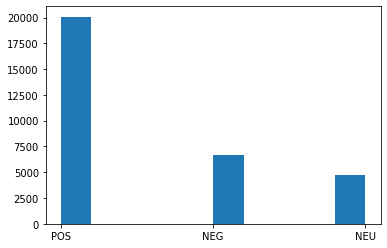

In [101]:
plt.hist(label(star), bins=10)

(array([4016.,    0.,    0.,    0.,    0., 1333.,    0.,    0.,    0.,
         939.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

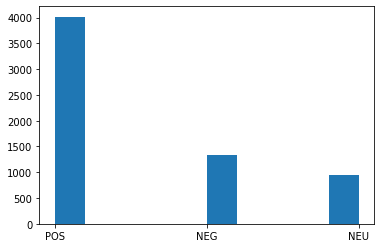

In [103]:
plt.hist(label(star_test), bins=10)

(array([16062.,     0.,     0.,     0.,     0.,  3755.,     0.,     0.,
            0.,  5331.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

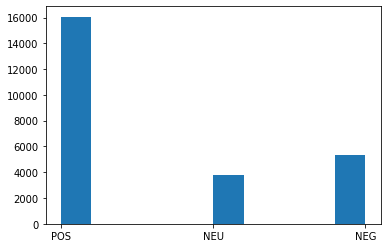

In [104]:
plt.hist(label(star_train), bins=10)

In [140]:
multi_nb.predict(['cảm ơn shop', 'dep lam shop oi'])

token transfrom call
tf transform call


<ipython-input-3-fd75e119c45a>:221: RuntimeWarning: divide by zero encountered in true_divide
  idf = np.where(idf == 0, 0, np.log(n_dim / idf))


array([5, 5])

In [319]:
text = tokenize(content_train, encoder)

In [320]:
text

[['dây',
  'đeo',
  'hơi',
  'mỏng',
  'nhưng',
  'cảm',
  'thấy',
  'phù',
  'hợp',
  'giá',
  'tiền',
  'đóng',
  'góp',
  'cẩn',
  'thận'],
 ['thiếu',
  '1',
  'khuy',
  'tuy',
  'nhiên',
  'vẫn',
  'cho',
  '5',
  'sao',
  'vì',
  'áo',
  'đẹp',
  'y',
  'hình',
  '^'],
 ['cái',
  'này',
  'chỉ',
  'già',
  'nh',
  'cho',
  'tuổi',
  'mới',
  'lớn',
  'mới',
  'mặc',
  'đc',
  'ak'],
 ['như', 'xà', 'phòng', 'ko', 'mùi', 'thì', 'đúng', 'hơn'],
 ['chất', 'lượng', 'sản', 'phẩm', 'ổn'],
 ['hàng',
  'bị',
  'lỗi',
  'dùng',
  'không',
  'được',
  'shop',
  'phản',
  'hồi',
  'đổi',
  'trả',
  'để',
  'mình',
  'sửa',
  'lại',
  'đánh',
  'giá',
  'nhé'],
 ['cute', 'bánh', 'bèo', '❤'],
 ['lần',
  'trước',
  'mua',
  'thì',
  '3',
  'ngày',
  'mới',
  'nhận',
  'đc',
  'hàng',
  'nhưng',
  'lần',
  'này',
  'mới',
  'đặt',
  'h',
  'qua',
  'thì',
  'hnay',
  'đã',
  'nhận',
  'đc',
  'hàng',
  'rùi',
  'dù',
  'nhà',
  'e',
  'ở',
  'xa',
  'hihi'],
 ['chất',
  'lượng',
  'sản',
  'phẩm'

In [196]:
model = gensim.models.Word2Vec(text, sg=1, hs=1, workers=4)

In [197]:
model.wv.most_similar('tuyệt')

[('vời', 0.8481953144073486),
 ('vờ', 0.8003683686256409),
 ('sản', 0.7375936508178711),
 ('phẩm', 0.7176791429519653),
 ('chắn', 0.6829987168312073),
 ('lượng', 0.6806297302246094),
 ('chắc', 0.6646513938903809),
 ('rất', 0.6370226740837097),
 ('đóng', 0.6363582015037537),
 ('gói', 0.6338643431663513)]

In [321]:
from gensim.models.doc2vec import TaggedDocument
tagdoc = []
for i, sent in enumerate(text):
    tagdoc.append(TaggedDocument(sent, ['doc' + str(i)]))

tagdoc[0]

TaggedDocument(words=['dây', 'đeo', 'hơi', 'mỏng', 'nhưng', 'cảm', 'thấy', 'phù', 'hợp', 'giá', 'tiền', 'đóng', 'góp', 'cẩn', 'thận'], tags=['doc0'])

In [249]:
gensim.models.Doc2Vec?

In [304]:
model = gensim.models.doc2vec.Doc2Vec(vector_size=300, dm=1, hs=0, alpha=0.025, min_alpha=0.001)

In [305]:
model.build_vocab(tagdoc)

In [315]:
infer = model.infer_vector(['chất', 'lượng', 'sản', 'phẩm', 'tạm', 'được'])

In [316]:
model.dv.most_similar([infer], topn=20)

[('doc17228', 0.4233257472515106),
 ('doc2346', 0.3736617863178253),
 ('doc13282', 0.3734687268733978),
 ('doc9549', 0.366828590631485),
 ('doc10984', 0.3559146821498871),
 ('doc23365', 0.3496111333370209),
 ('doc12548', 0.3476877510547638),
 ('doc10100', 0.3464163541793823),
 ('doc11107', 0.3425410985946655),
 ('doc18714', 0.34085923433303833),
 ('doc20790', 0.3365764617919922),
 ('doc6626', 0.3319645822048187),
 ('doc22188', 0.3311145603656769),
 ('doc20209', 0.33017757534980774),
 ('doc17691', 0.32812514901161194),
 ('doc17712', 0.32189032435417175),
 ('doc5330', 0.31907981634140015),
 ('doc8492', 0.3185300827026367),
 ('doc15374', 0.3151225745677948),
 ('doc2669', 0.31418508291244507)]